In [2]:
import pdb
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F

In [17]:
class LogisticNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()

    def forward(self, inputs: torch.Tensor):
        x = self.linear(inputs)
        x = self.sm(x)
        return x


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = LogisticNet()
net.to(device)

LogisticNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sm): Sigmoid()
)

In [18]:
def create_data(size=100000):
    x = torch.randint(low=0, high=50, size=(size, 2)).float()
    y = torch.Tensor([1 if x1 > x2 else 0 for x1, x2 in x]).float()
    y = torch.unsqueeze(y, dim=1)
    return x, y


x, y = create_data()

dataset = torch.utils.data.TensorDataset(x, y)
data_loader = torch.utils.data.DataLoader(dataset,
                                          batch_size=16,
                                          shuffle=True,
                                          num_workers=2)

In [19]:
data_iter = iter(data_loader)
xx, yy = next(data_iter)
print(xx)
print(yy)

tensor([[38., 29.],
        [ 3., 19.],
        [17., 48.],
        [41., 40.],
        [28., 22.],
        [28., 32.],
        [31., 43.],
        [12., 36.],
        [33., 28.],
        [ 0., 34.],
        [ 6., 35.],
        [33., 22.],
        [28., 41.],
        [ 2., 34.],
        [37., 31.],
        [ 3.,  9.]])
tensor([[1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.]])


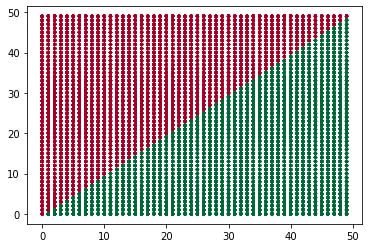

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x.numpy()[:, 0],
            x.numpy()[:, 1],
            c=y.numpy(),
            s=10,
            lw=0,
            cmap='RdYlGn')

In [24]:
def my_criterion(outputs, labels):
    return -torch.sum(labels * torch.log(outputs) + (1 - labels) *
                      torch.log(1 - outputs)) + 1e-10  # 最后加的1e-10防止出现nan

In [21]:
criterion = nn.BCELoss()  # 二元交叉熵
optimizer = optim.Adam(params=net.parameters())

In [22]:
for epoch in range(5):
    for i, data in enumerate(data_loader):
        inputs, label = data

        optimizer.zero_grad()

        outputs = net(inputs.to(device))
        loss = criterion(outputs.to(device), label.to(device))
        loss.backward()
        optimizer.step()

        if i % 1000 == 999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, loss))

[1,  1000] loss: 0.292
[1,  2000] loss: 0.195
[1,  3000] loss: 0.149
[1,  4000] loss: 0.078
[1,  5000] loss: 0.105
[1,  6000] loss: 0.059
[2,  1000] loss: 0.037
[2,  2000] loss: 0.063
[2,  3000] loss: 0.007
[2,  4000] loss: 0.021
[2,  5000] loss: 0.009
[2,  6000] loss: 0.043
[3,  1000] loss: 0.018
[3,  2000] loss: 0.011
[3,  3000] loss: 0.005
[3,  4000] loss: 0.034
[3,  5000] loss: 0.044
[3,  6000] loss: 0.079
[4,  1000] loss: 0.001
[4,  2000] loss: 0.087
[4,  3000] loss: 0.036
[4,  4000] loss: 0.055
[4,  5000] loss: 0.002
[4,  6000] loss: 0.038
[5,  1000] loss: 0.024
[5,  2000] loss: 0.014
[5,  3000] loss: 0.062
[5,  4000] loss: 0.001
[5,  5000] loss: 0.007
[5,  6000] loss: 0.081


In [15]:
net(torch.Tensor([[0, 10]]).to(device))

tensor([[1.5861e-06]], device='cuda:0', grad_fn=<SigmoidBackward>)

In [ ]:
import os
 
pid = os.getpid()
!taskkill /pid $pid /F